In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LES EXPERIMENTAL

In [2]:
nombres=np.loadtxt('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',dtype='U',max_rows=1,skiprows=2,delimiter='\t')
nombres[0]='fecha'
nombres[1]='hora'
nombres[3]='Ti'
nombres[6]='Tobj'
nombres[7]='To'
nombres[5]='Tg'
nombres[8]='Tsi_SC'
nombres[9]='Tso_SC'
LES=pd.read_csv('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',names=nombres,sep='\t',skiprows=3)
LES.hora = LES.hora.str.replace('p. m.','PM',regex=True)
LES.hora = LES.hora.str.replace('a. m.','AM',regex=True)
LES['time']=LES.fecha+ ' ' +LES.hora
LES.time= pd.to_datetime(LES.time,dayfirst=True)
LES.set_index('time',inplace=True)
del LES['fecha']
del LES['hora']
upsampled     = LES.resample('1Min').pad()
LES= upsampled.interpolate(method='time')
LES=LES.drop(LES.index[0])

IDF

In [3]:
nombres= np.loadtxt('../Datos/eh_simplificado_LES.csv',dtype='U',max_rows=1,delimiter=',')
nombres[0]='tiempo'
nombres[1]='Ta'
nombres[2]='Ti'

archivo = '../Datos/LES_enerhabitat.txt'
def importa(archivo,nombres):
    IDF= pd.read_csv(archivo,names=nombres,skiprows=1)
    IDF.tiempo= IDF.tiempo.str.replace('24:00:00','23:59:59')
    IDF.tiempo= '2019'+' '+ IDF.tiempo
    IDF.tiempo= pd.to_datetime(IDF.tiempo,format='%Y %m/%d %H:%M:%S')
    start_date = '2019 02/01'
    end_date   = '2019 02/02'
    IDF= IDF.loc[(IDF['tiempo'] > start_date) & (IDF['tiempo'] <= end_date)]
    IDF.set_index(IDF.tiempo,inplace=True)
    upsampled= IDF.resample('1Min').pad()
    IDF= upsampled.interpolate(method='time')
    IDF= upsampled.interpolate(method='time')
    del IDF['tiempo']
    return IDF
IDF = importa('../Datos/eh_simplificado_LES.csv',nombres)

IDF con aire acondicionado

In [4]:
IDF_AC = importa('../Datos/eh_simplificado_LES_AC.csv',nombres)

IDF con temperaturas superficiales

In [5]:
nombres4= np.loadtxt('../Datos/surfaceTemps.txt',dtype='U',max_rows=1,delimiter=',')
nombres4[0]='tiempo'
nombres4[1]='To'
nombres4[2]='S2_inside'
nombres4[3]='S2_outside'
nombres4[4]='Ti'

surface = importa('../Datos/surfaceTemps.txt', nombres4)
surface

,To,S2_inside,S2_outside,Ti
tiempo,,,,
2019-02-01 00:01:00,20.4,22.252870,20.445535,22.331237
2019-02-01 00:02:00,20.1,22.247435,20.197921,22.318119
2019-02-01 00:03:00,20.1,22.237512,20.188427,22.304625
2019-02-01 00:04:00,20.1,22.226851,20.182203,22.292133
2019-02-01 00:05:00,20.1,22.216661,20.177797,22.280503
...,...,...,...,...
2019-02-01 23:55:00,20.4,24.380429,20.542269,24.466128
2019-02-01 23:56:00,20.4,24.364669,20.538861,24.450464
2019-02-01 23:57:00,20.4,24.348906,20.536009,24.434832


In [12]:
pico = importa('../Datos/con_pico.txt',nombres4)
pico

,To,S2_inside,S2_outside,Ti
tiempo,,,,
2019-02-01 00:01:00,20.4,22.252870,20.445535,22.331237
2019-02-01 00:02:00,20.1,22.247919,20.214224,22.318167
2019-02-01 00:03:00,20.1,22.239010,20.202749,22.304842
2019-02-01 00:04:00,20.1,22.229438,20.195046,22.292664
2019-02-01 00:05:00,20.1,22.220285,20.189490,22.281476
...,...,...,...,...
2019-02-01 23:55:00,20.4,25.108360,20.596952,25.175334
2019-02-01 23:56:00,20.4,25.096209,20.592518,25.163339
2019-02-01 23:57:00,20.4,25.084077,20.588771,25.151333


Igualar el time step

In [6]:
dt=IDF.index-LES.index
LES.index=LES.index+dt

Graficar

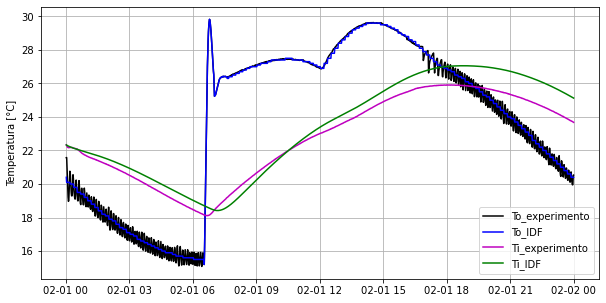

In [20]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.ylabel('Temperatura [°C]')
#plt.title("IDF en condiciones de ener-habitat")



ax.plot(LES.To, 'k', label   = 'To_experimento')
ax.plot(pico.To, 'b', label   = 'To_IDF')

ax.plot(LES.Ti, 'm', label   = 'Ti_experimento')
ax.plot(pico.Ti, 'g', label   = 'Ti_IDF')





plt.grid()
ax.legend(loc='lower right')